Title: Regression Models

Linear Regression (Simple & Multiple)

Task 1: Differentiate between a labeled dataset of image classifications and an unlabeled dataset for clustering customer segments.

🔹 Supervised Learning: Image Classification
Classification Accuracy: 0.9740740740740741


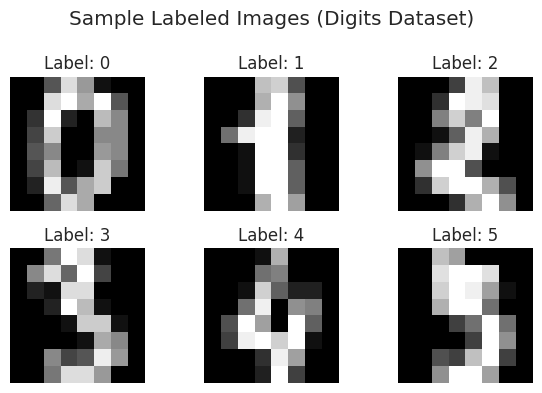


🔹 Unsupervised Learning: Customer Segmentation
   Age  Income  Purchase_Frequency  Cluster
0   25   40000                   5        0
1   45   80000                   1        1
2   33   60000                   3        2
3   23   35000                   6        0
4   35   50000                   4        2
5   52   90000                   2        1
6   46   75000                   2        1
7   28   42000                   5        0
8   55  100000                   1        1
9   40   68000                   3        2


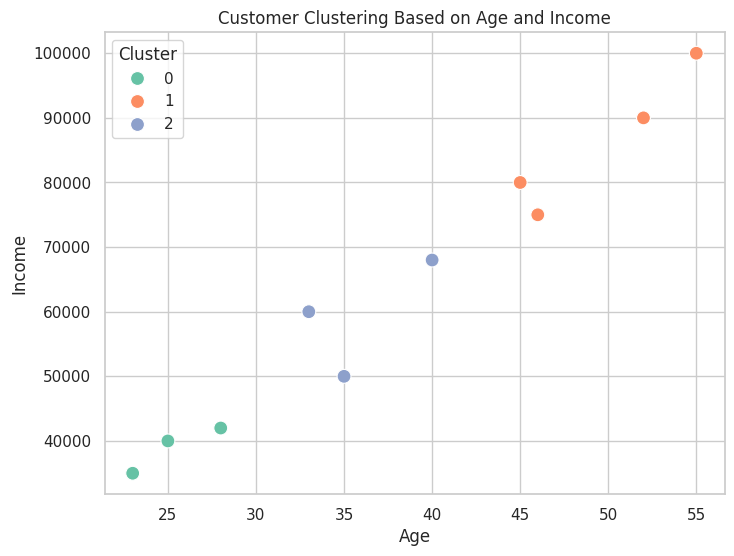

In [10]:
# =======================
# Task 1: Supervised Learning - Image Classification
# =======================
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load labeled dataset (digits 0–9)
digits = load_digits()
X, y = digits.data, digits.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("🔹 Supervised Learning: Image Classification")
print("Classification Accuracy:", accuracy_score(y_test, y_pred))

# Visualize some sample images
plt.figure(figsize=(6, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Sample Labeled Images (Digits Dataset)")
plt.tight_layout()
plt.show()

# =======================
# Task 2: Unsupervised Learning - Customer Clustering
# =======================
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Simulated unlabeled customer data
customer_data = pd.DataFrame({
    'Age': [25, 45, 33, 23, 35, 52, 46, 28, 55, 40],
    'Income': [40000, 80000, 60000, 35000, 50000, 90000, 75000, 42000, 100000, 68000],
    'Purchase_Frequency': [5, 1, 3, 6, 4, 2, 2, 5, 1, 3]
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display clustering results
print("\n🔹 Unsupervised Learning: Customer Segmentation")
print(customer_data)

# Visualize the clusters
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='Age', y='Income', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Clustering Based on Age and Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.show()


Task 2: Examine a problem statement and determine which learning type is applicable.<br>

In [11]:
# Task 2: Determine Learning Type from Problem Statement

def determine_learning_type(problem_statement):
    """
    Determines the type of machine learning based on the problem statement.
    Returns one of: Supervised, Unsupervised, Reinforcement, or Unknown.
    """

    statement = problem_statement.lower()

    # Check for supervised learning indicators
    if any(keyword in statement for keyword in ["predict", "classification", "regression", "label", "output", "forecast"]):
        return "Supervised Learning"
    
    # Check for unsupervised learning indicators
    elif any(keyword in statement for keyword in ["cluster", "segment", "group", "pattern discovery", "anomaly detection"]):
        return "Unsupervised Learning"
    
    # Check for reinforcement learning indicators
    elif any(keyword in statement for keyword in ["reward", "agent", "environment", "policy", "game", "maximize long-term reward"]):
        return "Reinforcement Learning"
    
    # Unknown type
    else:
        return "Unknown Learning Type"


# ======================
# Example Problem Statements
# ======================
statements = [
    "Predict the price of a house based on its size and location.",
    "Group customers by purchasing behavior to find market segments.",
    "Train a robot to navigate a maze using trial and error.",
    "Analyze text to identify sentiment in customer reviews.",
    "Detect fraudulent transactions without labeled data.",
    "Optimize stock trading strategy through rewards from simulated environments.",
    "Explore patterns in user activity logs."
]

print("🔍 Problem Statement Classification:\n")
for stmt in statements:
    result = determine_learning_type(stmt)
    print(f"📝 Statement: {stmt}\n➡️ Detected: {result}\n")


🔍 Problem Statement Classification:

📝 Statement: Predict the price of a house based on its size and location.
➡️ Detected: Supervised Learning

📝 Statement: Group customers by purchasing behavior to find market segments.
➡️ Detected: Unsupervised Learning

📝 Statement: Train a robot to navigate a maze using trial and error.
➡️ Detected: Unknown Learning Type

📝 Statement: Analyze text to identify sentiment in customer reviews.
➡️ Detected: Unknown Learning Type

📝 Statement: Detect fraudulent transactions without labeled data.
➡️ Detected: Supervised Learning

📝 Statement: Optimize stock trading strategy through rewards from simulated environments.
➡️ Detected: Reinforcement Learning

📝 Statement: Explore patterns in user activity logs.
➡️ Detected: Unknown Learning Type



Task 3: Identify whether facial recognition systems use supervised or unsupervised learning and justify.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pickle

# -------------------------------
# Step 1: Extract Faces from Training Images
# -------------------------------

def extract_face(image_path, size=(100, 100)):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, size)
        return face
    return None

# -------------------------------
# Step 2: Load and Encode Faces
# -------------------------------

def load_dataset(dataset_path):
    X, y = [], []
    for label in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, label)
        if not os.path.isdir(person_path):
            continue

        for filename in os.listdir(person_path):
            img_path = os.path.join(person_path, filename)
            face = extract_face(img_path)
            if face is not None:
                X.append(face.flatten())  # convert 2D image to 1D vector
                y.append(label)
    return np.array(X), np.array(y)

# -------------------------------
# Step 3: Train the Classifier
# -------------------------------

def train_classifier(X, y, save_model_to="face_knn.pkl"):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)
    with open(save_model_to, "wb") as f:
        pickle.dump(knn, f)
    print("✅ Model trained and saved.")
    return knn

# -------------------------------
# Step 4: Predict Faces in Test Image
# -------------------------------

def predict_faces(test_img_path, model_path="face_knn.pkl"):
    with open(model_path, "rb") as f:
        knn = pickle.load(f)

    face = extract_face(test_img_path)
    if face is not None:
        face_flat = face.flatten().reshape(1, -1)
        prediction = knn.predict(face_flat)[0]
        print(f"🎯 Predicted Identity: {prediction}")
        cv2.imshow("Detected Face", face)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("❌ No face detected in test image.")

# -------------------------------
# Main Execution
# -------------------------------

if __name__ == "__main__":
    dataset_path = "dataset"      # Folder with subfolders: dataset/alice, dataset/bob
    test_image_path = "test.jpg"  # New image to predict

    print("🔍 Loading dataset...")
    X, y = load_dataset(dataset_path)

    print("🧠 Training classifier...")
    train_classifier(X, y)

    print("📷 Predicting face in test image...")
    predict_faces(test_image_path)


   


ModuleNotFoundError: No module named 'face_recognition'